# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**
***
<font color='blue'>Para una problemática como la que se plantea, creo que las principales características que determinan el precio de venta de una propiedad son: la superficie y la cantidad de ambientes que posee. No obstante, hay muchas más características que son determinantes, como el tipo de vivienda (por ejemplo, si es casa o departamento), su ubicación geográfica, si incluye a o no cocheras, la cantidad de baños y habitaciones.
</font>

 ***

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# Previamente debe descargarse del siguiente link: https://drive.google.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")

In [4]:
print("Columnas:",df.shape[1])
print("Filas:",df.shape[0])

Columnas: 19
Filas: 146660


In [5]:
# Imprimo .info() para ver los atributos, la cantidad de valores no nulos y sus tipos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
# Cantidad de valores nulos por columns del dataset
nulls = pd.DataFrame(df.isnull().sum(), columns=['Cantidad de Nulos'])
nulls

,Cantidad de Nulos
start_date,0
end_date,0
created_on,0
lat,9925
lon,9959
l1,0
l2,0
l3,0
rooms,0
bedrooms,0


In [81]:
# Le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [8]:
df.price.quantile(0.90)

430000.0

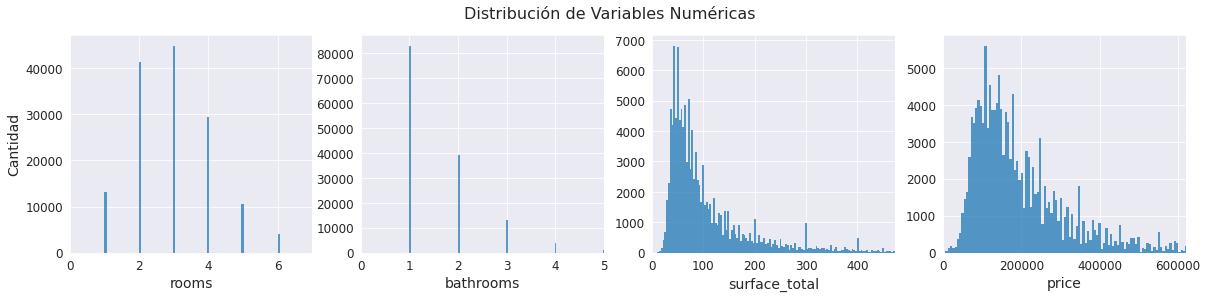

In [9]:
# A contnuación vamos a graficar histogramas para las variables numéricas
# Limito la gráfica de los valores al percentil 95 para una mejor visualización de las distribuciones,
# ya que hay valores (en las variables de superficie y precio) demasiado altos, NO representativos de la muestra.
# Esto achata mucho los gráficos hacia la izquierda, dificultando su visualización.

fig, axes = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
fig.suptitle('Distribución de Variables Numéricas')
axes[0] = sns.histplot(ax=axes[0], data=df, x='rooms')
axes[0].set_ylabel('Cantidad')
axes[1] = sns.histplot(ax=axes[1], data=df, x='bathrooms')
axes[2] = sns.histplot(ax=axes[2], data=df, x='surface_total')
axes[3] = sns.histplot(ax=axes[3], data=df, x='price')
axes[0].set_xlim([0,df.rooms.quantile(0.99)])
axes[1].set_xlim([0,df.bathrooms.quantile(0.99)])
axes[2].set_xlim([0,df.surface_total.quantile(0.95)])
axes[3].set_xlim([0,df.price.quantile(0.95)])

for ax in axes[1:]:
  ax.set_ylabel('')

plt.show()

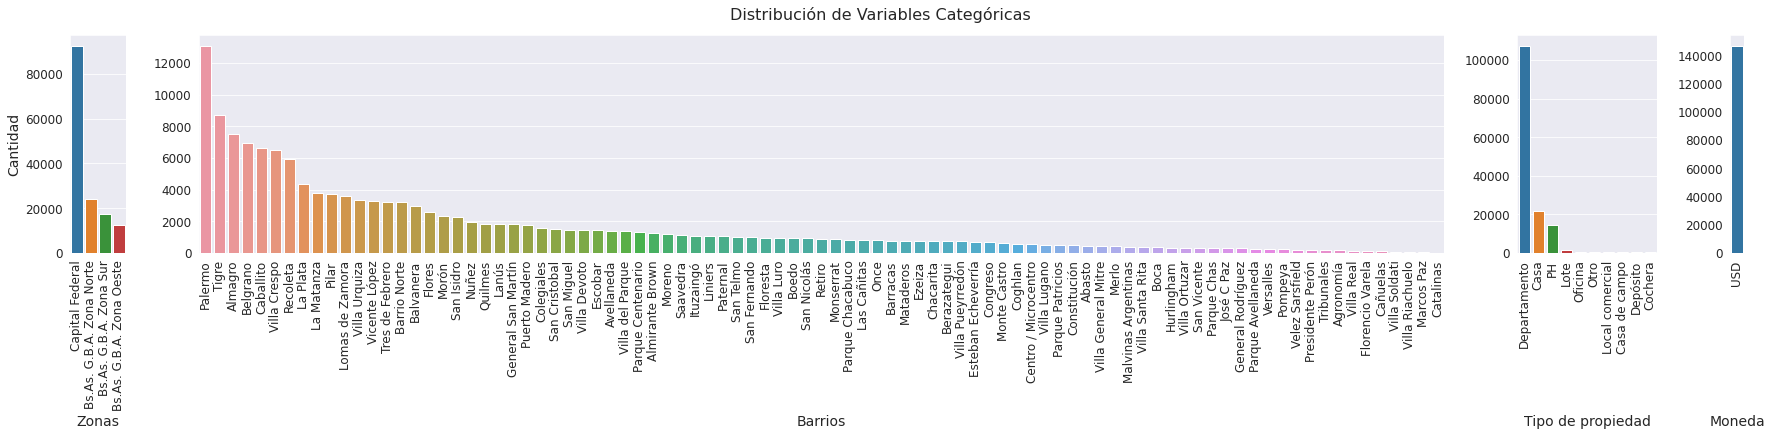

In [10]:
# A contnuación vamos a graficar barplots para las variables categóricas
zonas = df['l2'].value_counts()
barrios = df['l3'].value_counts()
tipos = df['property_type'].value_counts()
monedas = df['currency'].value_counts()

fig, axes = plt.subplots(1, 4, figsize=(30, 4), gridspec_kw={'width_ratios': [zonas.index.shape[0], barrios.index.shape[0], tipos.index.shape[0], monedas.index.shape[0]]})
fig.suptitle('Distribución de Variables Categóricas')
axes[0] = sns.countplot(ax=axes[0], data=df, x='l2', order=zonas.index)
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Zonas')
axes[1] = sns.countplot(ax=axes[1], data=df, x='l3', order=barrios.index)
axes[1].set_xlabel('Barrios')
axes[2] = sns.countplot(ax=axes[2], data=df, x='property_type', order=tipos.index)
axes[2].set_xlabel('Tipo de propiedad')
axes[3] = sns.countplot(ax=axes[3], data=df, x='currency')
axes[3].set_xlabel('Moneda')

for ax in axes[1:]:
  ax.set_ylabel('')

for ax in axes:
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

fig.align_labels()

plt.show()

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [11]:
# Tipos de propiedad
property_types = set(df.property_type)
print("Existen",len(property_types),"tipos de propiedad en el dataset y son los siguientes:")

for i, item in enumerate(property_types,1):
  print('  ', i, '. ' + item, sep='',end='\n')

Existen 10 tipos de propiedad en el dataset y son los siguientes:
  1. Casa
  2. Departamento
  3. Depósito
  4. Lote
  5. Oficina
  6. Otro
  7. Local comercial
  8. Cochera
  9. Casa de campo
  10. PH


In [12]:
# Cantidad de instancias por Tipo de Propiedad
tipos_de_propiedad = df['property_type'].value_counts().to_frame("Cantidad")
tipos_de_propiedad

,Cantidad
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265
Cochera,259


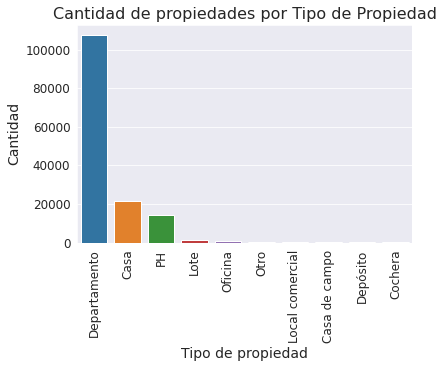

In [13]:
# Graficamos la cantidad de propiedades por Tipo de propiedad
sns.barplot(data=tipos_de_propiedad, x=tipos_de_propiedad.index , y='Cantidad')
plt.title('Cantidad de propiedades por Tipo de Propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, '')

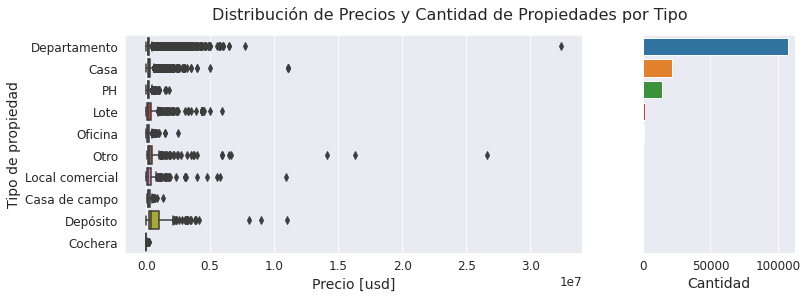

In [14]:
# Generamos un gráfico de la distribución de la variable Precio por Tipo de propiedad y las Cantidades de Propiedades por Tipo
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Distribución de Precios y Cantidad de Propiedades por Tipo')

# Boxplot
sns.boxplot(ax=axes[0], x=df.price, y=df.property_type, order=tipos_de_propiedad.index)
axes[0].set_xlabel('Precio [usd]')
axes[0].set_ylabel('Tipo de propiedad')

# Barplot
sns.barplot(ax=axes[1], x=tipos_de_propiedad.Cantidad, y=tipos_de_propiedad.index, order=tipos_de_propiedad.index )
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [15]:
# Cantidad de instancias por Zona
zonas = df['l2'].value_counts().to_frame("Cantidad")
zonas

,Cantidad
Capital Federal,92539
Bs.As. G.B.A. Zona Norte,24282
Bs.As. G.B.A. Zona Sur,17173
Bs.As. G.B.A. Zona Oeste,12666


In [16]:
# Cantidad de instancias por Barrio
barrios = df['l3'].value_counts().to_frame("Cantidad")
barrios

,Cantidad
Palermo,13073
Tigre,8718
Almagro,7527
Belgrano,6935
Caballito,6650
...,...
Cañuelas,108
Villa Soldati,69
Villa Riachuelo,42
Marcos Paz,35


In [17]:
# Preparamos el dataset para graficar la cantidad de propiedades por zona y por barrio
df_cab = df[df.l2=='Capital Federal']
df_nor = df[df.l2=='Bs.As. G.B.A. Zona Norte']
df_oes = df[df.l2=='Bs.As. G.B.A. Zona Oeste']
df_sur = df[df.l2=='Bs.As. G.B.A. Zona Sur']

barrios_cab = df_cab['l3'].value_counts().to_frame("Cantidad")
barrios_nor = df_nor['l3'].value_counts().to_frame("Cantidad")
barrios_oes = df_oes['l3'].value_counts().to_frame("Cantidad")
barrios_sur = df_sur['l3'].value_counts().to_frame("Cantidad")

rel = []
rel.append(round(zonas.count() / barrios.count() * 10, 4) * 2)
rel.append(round(barrios_cab.count() / barrios.count() * 10, 4))
rel.append(round(barrios_nor.count() / barrios.count() * 10, 4))
rel.append(round(barrios_sur.count() / barrios.count() * 10, 4))
rel.append(round(barrios_oes.count() / barrios.count() * 10, 4))

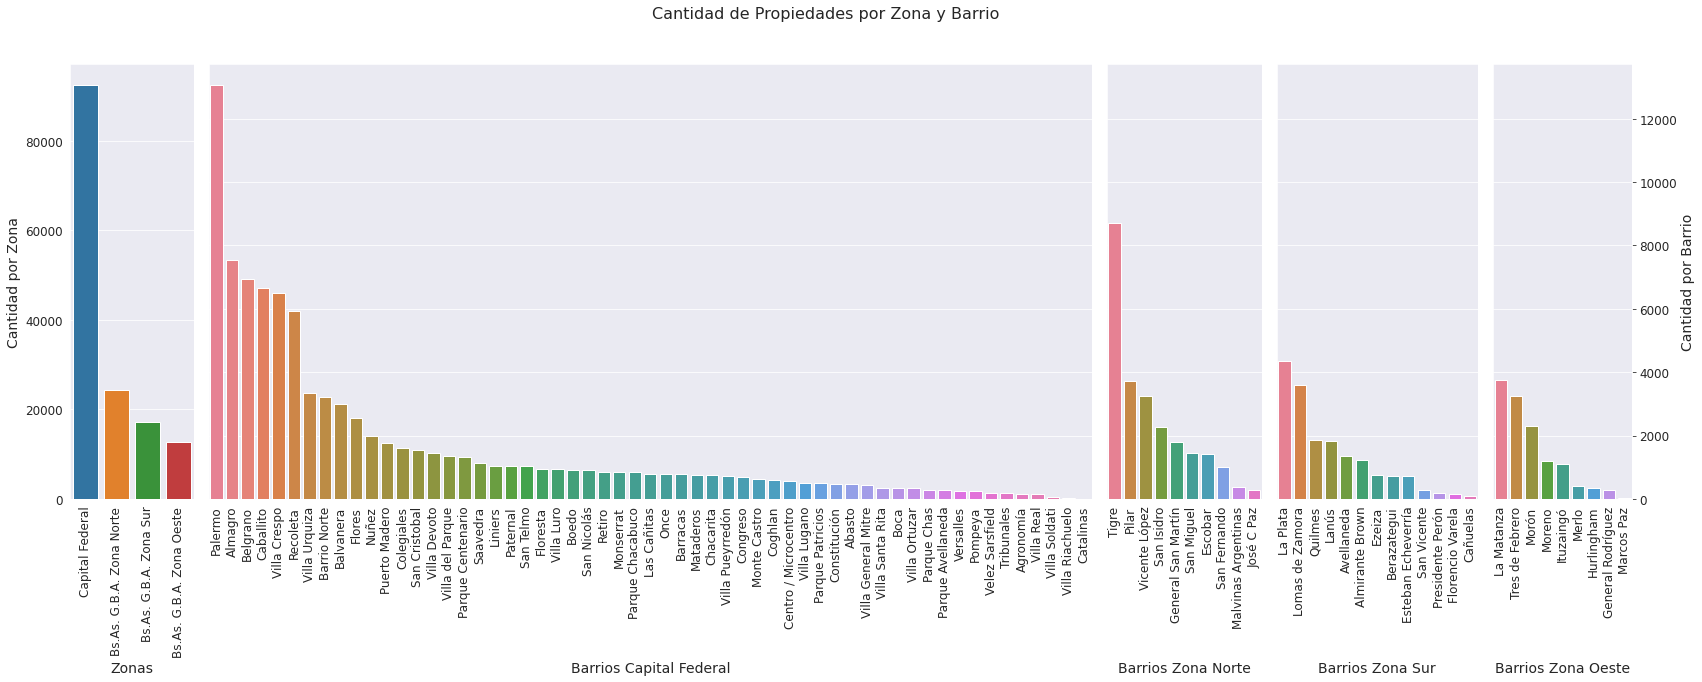

In [18]:
# Graficamos la cantidad de Propiedades por Zona y por Barrio
fig, axes = plt.subplots(1, 5, figsize=(28, 8), gridspec_kw={'width_ratios': rel})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
fig.suptitle('Cantidad de Propiedades por Zona y Barrio')

# Barplot 0
ax0 = sns.barplot(ax=axes[0,], y=zonas.Cantidad, x=zonas.index, order=zonas.index)
axes[0].set_xlabel('Zonas')
axes[0].set_ylabel('Cantidad por Zona')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

# Barplot 1
ax1 = sns.barplot(ax=axes[1,], y=barrios_cab.Cantidad, x=barrios_cab.index, order=barrios_cab.index, palette="husl")
axes[1].set_xlabel('Barrios Capital Federal')
axes[1].set_ylabel('')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)

# Barplot 2
ax2 = sns.barplot(ax=axes[2,], y=barrios_nor.Cantidad, x=barrios_nor.index, order=barrios_nor.index, palette="husl")
axes[2].set_xlabel('Barrios Zona Norte')
axes[2].set_ylabel('')
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=90)

# Barplot 3
ax3 = sns.barplot(ax=axes[3,], y=barrios_sur.Cantidad, x=barrios_sur.index, order=barrios_sur.index, palette="husl")
axes[3].set_xlabel('Barrios Zona Sur')
axes[3].set_ylabel('')
plt.setp(axes[3].xaxis.get_majorticklabels(), rotation=90)

# Barplot 4
ax4 = sns.barplot(ax=axes[4,], y=barrios_oes.Cantidad, x=barrios_oes.index, order=barrios_oes.index, palette="husl")
axes[4].set_xlabel('Barrios Zona Oeste')
axes[4].set_ylabel('Cantidad por Barrio')
plt.setp(axes[4].xaxis.get_majorticklabels(), rotation=90)
axes[4].yaxis.set_label_position("right")
axes[4].yaxis.tick_right()

axes[1].get_shared_y_axes().join(axes[1], axes[2], axes[3], axes[4])
# axes[4].autoscale() # <-- needed if no axes limits are explicitely set.

for ax in axes[1:4]:
    ax.yaxis.set_ticklabels([])
    ax.yaxis.tick_right()
    ax.yaxis.set_tick_params(length=0)

ylim = axes[1].get_ylim()
for ax in axes[1:]:
    ax.set_ylim(ylim)

fig.align_labels()

plt.show()

***
<font color='blue'>**Comentarios**</font>

<font color='blue'>Se puede ver claramanete que la mayor cantidad de inmuebles se concentran en Capital Federal. Al mismo tiempo, Palermo es el barrio con más propiedades en el dataset (perteneciendo a Capital Federal), seguido de Tigre (que pertenece a la Zona Norte de Bs. As.) </font>
***

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [19]:
# Filtramos por aquellas Popiedades de Capital Federal que son de los Tipos 'Departamento', 'Casa' o 'PH'
df2 = df[(df.property_type.isin(['Departamento', 'Casa', 'PH'])) & (df.l2 == 'Capital Federal')]
print(df2.shape)

(91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

<font color='blue'>Utilizamos .describe() para obtener diferentes valores estadísticos de los campos numéricos. Esto nos va a servir para continuar con la limpieza de los datos.</font>

In [20]:
# Uso .describe() para ver los datos estadísticos que describe el conjunto de datos.
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


***
<font color='blue'> **Observaciones**</font>
1. <font color='blue'>Los valores máximos se alejan demasiado de la media e incluso del 3er cuartil (evidentemente se trata de propiedades poco típicas dentro de la muestra).</font>
2. <font color='blue'>Los valores mínimos de ***surface_total*** y ***surface_covered*** son demasiado bajos (debe tratarse de errores de carga). Es probable que haya que descartarlos o corregirlos.</font>
3. <font color='blue'>Se ve mucha amplitud en la variable ***price*** ya que el valor mínimo es 6.000 y el máximo 32.000.000.</font>
4. <font color='blue'>Por otro lado, hay propiedades cargadas que no tienen información sobre las variables ***lat***, ***lon***, ***bathrooms***, ***surface_total*** o ***surface_covered***.</font>
5. <font color='blue'>Hay propiedades que no tienen datos de superficie (que representa un input muy importante a la hora de tasar una propiedad).</font>


<font color='blue'>**Del análisis exploratorio inicial, surgen las además siguientes acciones a realizar:**</font>

- <font color='blue'>Se podrían eliminar aquellas columnas que no agreguen información útil para el modelo son: `['start_date', 'end_date', 'created_on', 'title', 'description', 'currency', 'l1', 'operation_type']`.</font>

- <font color='blue'>Filtrar por tipo de propiedad podría reducir la dispersión y sobre todo acotar los valores máximos que pueden crear sesgos indeseados.</font>

- <font color='blue'>Eliminar aquellas propiedades que tengan valores de superficie muy bajos o que directamente no tengan ningún valor.</font>

- <font color='blue'>Se podría cargar al menos un baño en las propiedades que sean viviendas que no tengan ese dato cargado.</font>

- <font color='blue'>Si `'surface_covered'` > `'surface_total'`, entonces reasignar `'surface_covered'` = `'surface_total'`.</font>
***

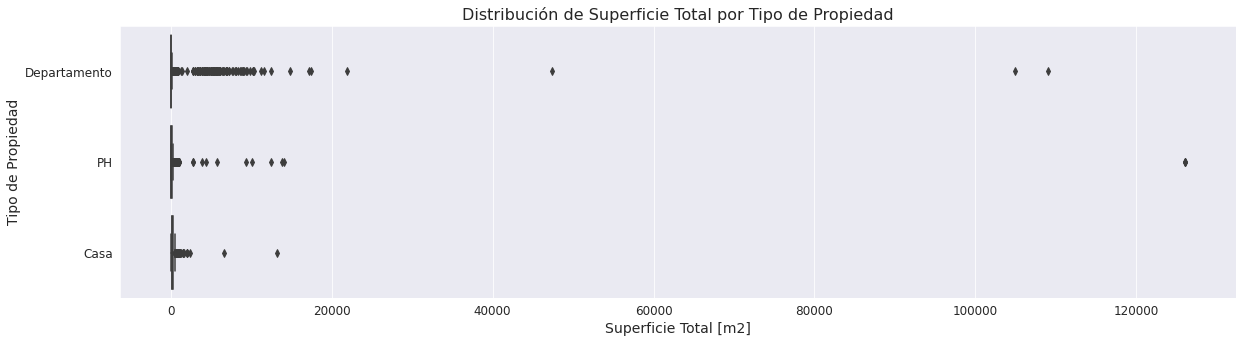

In [21]:
# Analizaremos la columna surface_total
# Primero graficaremos un boxplot
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(ax=ax, y="property_type", x="surface_total", data=df2)
plt.title('Distribución de Superficie Total por Tipo de Propiedad')
plt.ylabel('Tipo de Propiedad')
plt.xlabel('Superficie Total [m2]')
plt.show()

***
<font color='blue'>**Comentarios**</font>

1. <font color='blue'>Se pueden ver muchos valores *outliers*, por lo que deberemos filtrar los datos.</font>
2. <font color='blue'>Vamos a filtrar esta columna con un valor menor a 500.</font>
3. <font color='blue'>Luego graficaremos para ver la distribución de los valores nuevamente.</font>
***

In [22]:
# Creamos un nuevo DataFrame filtrado, con las instancias que posean menos de 300 como 'surface_total'
df3 = df2[df2.surface_total <= 600]
print(df3.shape)

(82266, 19)


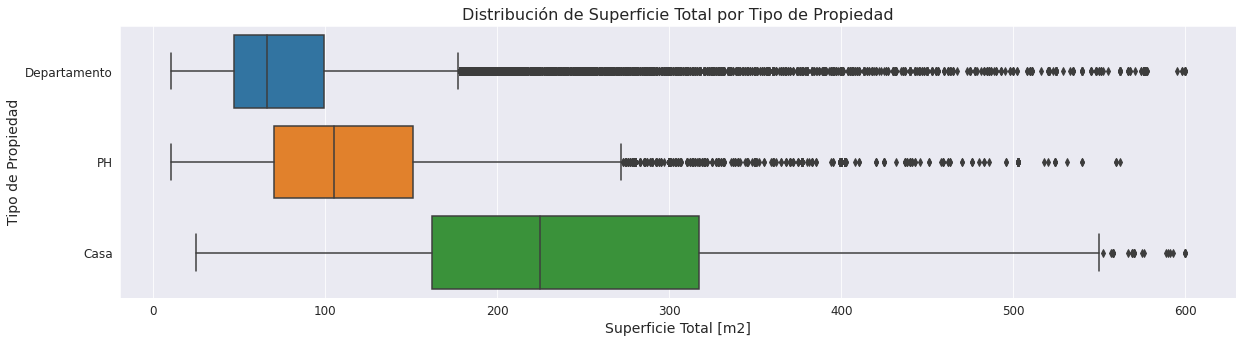

In [23]:
# Volvemos a graficar
# Primero graficaremos un boxplot
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(ax=ax, y="property_type", x="surface_total", data=df3)
plt.title('Distribución de Superficie Total por Tipo de Propiedad')
plt.ylabel('Tipo de Propiedad')
plt.xlabel('Superficie Total [m2]')
plt.show()

In [24]:
# Filtramos el dataset por aquellas propiedades que tienen al menos una Superficie Total de 25 m2
df4 = df3[df3.surface_total >= 25]
print(df4.shape)

(81727, 19)


In [25]:
# Verifico que la superfice cubierta no sea mayor que la total
# A continuación vamos a filtrar aquellas propiedades que posean 'surface_covered' > 'surface_total' ya que son  inconsistencias del dataset.
mascara = (df4.surface_covered) > (df4.surface_total)
print("La cantidad de instancias que tienen 'surface_covered' mayor que 'surface_total' es:", df4[mascara].shape[0])

# Elimino las instancias con 'surface_covered' mayor que 'surface_total'
df5 = df4[~ mascara]
print(df4.shape[0] - df5.shape[0],'instancias eliminadas')

La cantidad de instancias que tienen 'surface_covered' mayor que 'surface_total' es: 715
715 instancias eliminadas


<font color='blue'>A continuación analizaremos la variable ***price*** y su distribución dentro de la muestra</font>

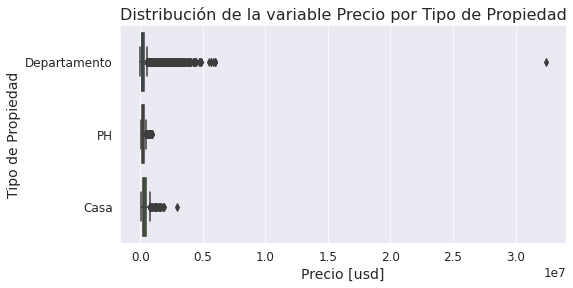

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df5, y='property_type', x='price')
plt.title("Distribución de la variable Precio por Tipo de Propiedad")
plt.ylabel("Tipo de Propiedad")
plt.xlabel("Precio [usd]")
plt.show()

In [27]:
# Debido a que existen valores muy altos que son poco representativos, debemos filtrar por un precio que consideremos máximo razonable (por ejemplo 1.000.000 usd).
df6 = df5[df5.price < 1000000]

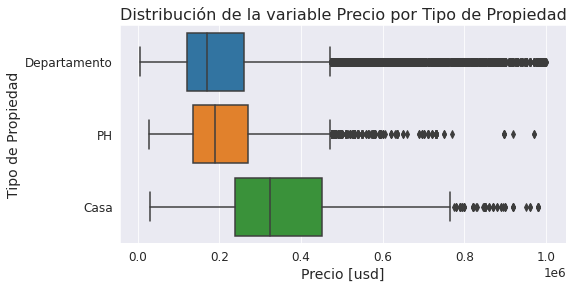

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df6, y='property_type', x='price')
plt.title("Distribución de la variable Precio por Tipo de Propiedad")
plt.ylabel("Tipo de Propiedad")
plt.xlabel("Precio [usd]")
plt.show()

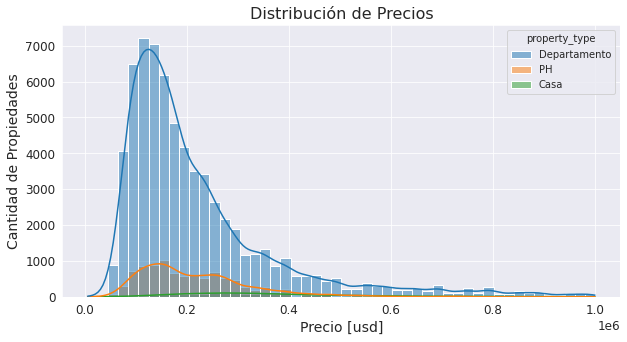

In [29]:
plt.figure(figsize=(10,5))
g = sns.histplot(data=df6, x='price', kde=True, bins=50, hue='property_type')
plt.title("Distribución de Precios")
plt.xlabel("Precio [usd]")
plt.ylabel("Cantidad de Propiedades")
plt.show()

In [30]:
# sns.pairplot(data=df6)
# plt.show()

<font color='blue'>Se observa un notable correlación lineal entre las variables ***surface_covered*** y ***surface_total***, no así entre las variables ***bathrooms***, ***rooms*** y ***bedrooms*** con las variables ***lat*** y ***lon***. </font>

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1.0, 'Mapa de Correlaciones')

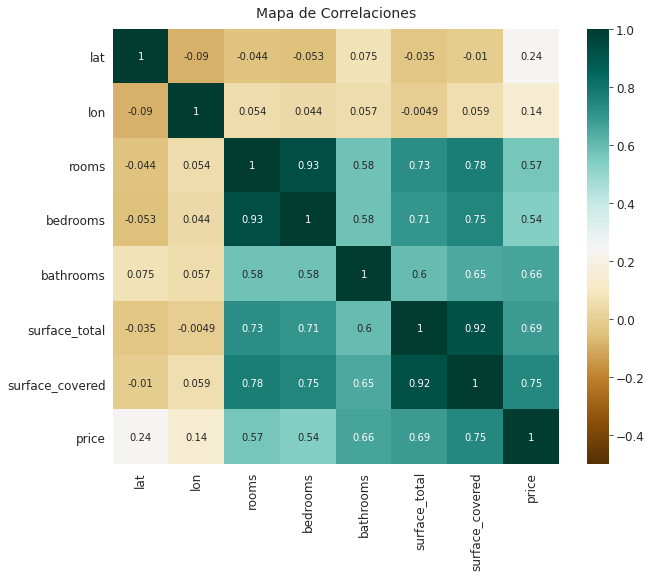

In [31]:
# Para ver las correlaciones lineales entre las variables numéricas generamos un Heatmap de .corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df6.corr(), vmin=-0.5, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Correlaciones', fontdict={'fontsize':14}, pad=12)

<font color='blue'>Viendo el Mapa de correlaciones, las mejores variables numéricas para predecir el Precio en principio serían: ***surface_covered***, ***surface_total***, ***bathrooms***, ***rooms*** y ***bedrooms***, ya que presentar mayores correlaciones lineales que las variables ***lat*** y ***lon***. </font>

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


***
<font color='blue'>**Comentarios**</font>


<font color='blue'>Aparentemente las variables ***lat*** y ***lon*** no parecen servir para realizar predicciones. Pero la realidad es que todos sabemos que existe una relación entre el precio de un inmueble y su locaclización geográfico. Por lo tanto, podríamos analizar si podemois detectar alguna relación entre estas variables.</font>
***

In [32]:
# Creamos un columna adicional que sea el precio por m2
df6['m2_price'] = df6['price'] / df6['surface_total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


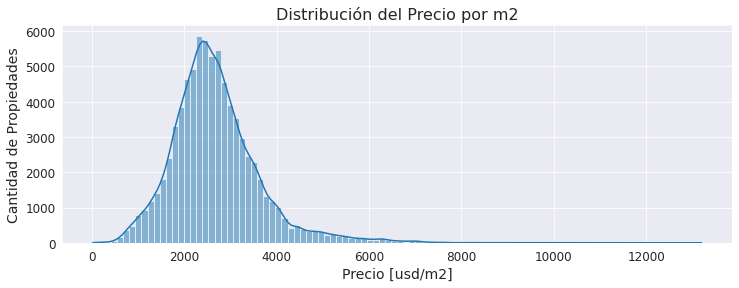

In [33]:
# Analizamos la distribución de la nueva variable en el dataset
plt.figure(figsize=(12,4), facecolor='w', edgecolor='k')
sns.histplot(df6['m2_price'], kde=True, bins=100)
plt.title("Distribución del Precio por m2")
plt.xlabel("Precio [usd/m2]")
plt.ylabel("Cantidad de Propiedades")
plt.show()

In [34]:
# Filtramos un poco el dataset para tener valores más representativos
df6 = df6[df6['m2_price'] < 6000]
df3.shape

(82266, 19)

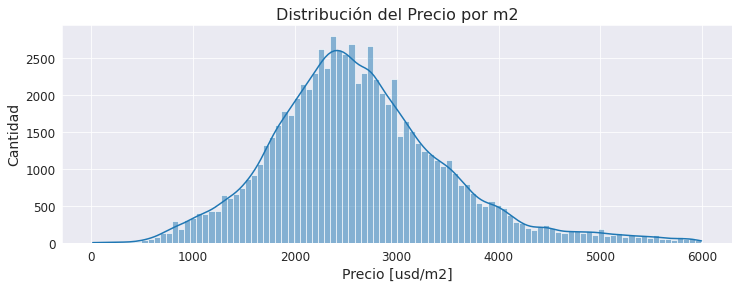

In [35]:
# Y volvemos a graficar para ver el cambio de la distribución
plt.figure(figsize=(12,4), facecolor='w', edgecolor='k')
sns.histplot(df6['m2_price'], kde=True, bins=100)
plt.title("Distribución del Precio por m2")
plt.xlabel("Precio [usd/m2]")
plt.ylabel("Cantidad")
plt.show()

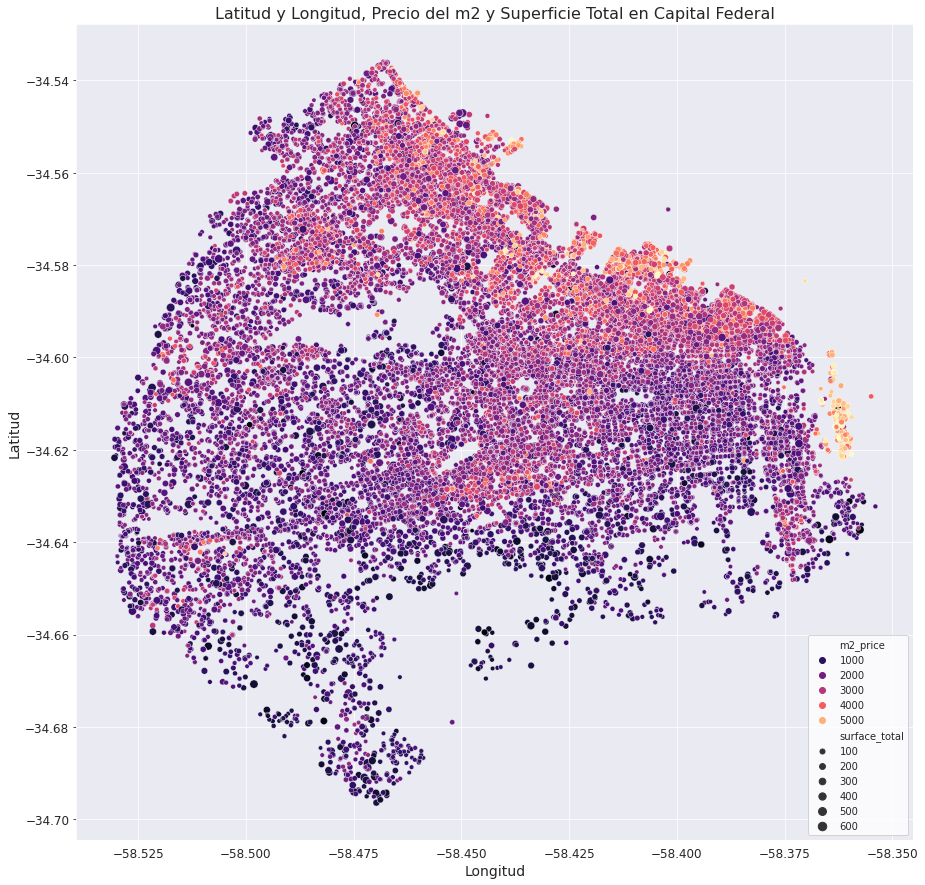

In [36]:
# A continuación graficamos un Scatter utilizando las posiciones 'lat' y 'lon'
# de las Propiedades, con un gradiente de color para la variable 'm2_price'
# y el tamaño de los puntos representando la Superficie del inmueble.

plt.figure(figsize=(15,15), facecolor='w', edgecolor='k')
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
sns.scatterplot(data=df6, x="lon", y="lat", hue="m2_price", size="surface_total", palette='magma')
plt.legend(loc='lower right', borderaxespad=0.5, facecolor='w', fontsize=10)
plt.title("Latitud y Longitud, Precio del m2 y Superficie Total en Capital Federal")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

***
<font color='blue'>**Comentarios**</font>

<font color='blue'>Luego, podemos ver que existe cierta tendencia a que los precios por m2 de las zonas de la Ciudad de Buenos Aires aledañas al Río de la Plata son más altos. Hacia el Oeste y el Sur los precios tienen a ser menores<font>

<font color='blue'>A partir de este análisis me surge la pregunta:

**¿Será posible utilizar las etiquetas de Barrio/Zona o los pares de valor de Latitud/Longitud para entrenar el modelo?**</font>

<font color='blue'></font>

***

***
### <font color='blue'>Desafío</font>

<font color='blue'>¿Cuál es el barrio más caro del dataset?</font>

***

In [37]:
# Agrupo por barrio para averiguar cuales son los Barrios con el Precio por superficie más alto
por_barrio = df6.pivot_table(index='l3', values=['price', 'm2_price', 'surface_total', 'rooms'], aggfunc='mean')
por_barrio = pd.DataFrame(por_barrio.to_records())
por_barrio.rename(columns = {'l3' : 'barrio'}, inplace = True)
por_barrio = por_barrio.sort_values(by = 'm2_price', ascending=False)
por_barrio.head()

,barrio,m2_price,price,rooms,surface_total
34,Puerto Madero,4895.877501,520157.453228,2.740448,108.666667
19,Las Cañitas,3561.269255,368771.928910,3.121643,107.110585
26,Palermo,3232.031814,266950.561908,2.849439,85.383199
6,Belgrano,3217.248816,302675.375959,3.043874,97.209024
35,Recoleta,3216.804540,338051.238594,3.354533,108.981829


In [38]:
print("El barrio más caro es Puerto", por_barrio.sort_values(by='m2_price', ascending=False).barrio.to_numpy()[0])

El barrio más caro es Puerto Puerto Madero


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

***

<font color='blue'>**Comentarios**</font>

<font color='blue'>- Métrica: Elijo $R^2$, ya que permite comparar la calidad de las predicciones entre modelos distintos.</font>

<font color='blue'>- Variables predictoras: `['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']`</font>

<font color='blue'>- Variable a predecir: `'price'`</font>

***

In [39]:
# Filtramos el dataset según los requerimientos
tipos = ['Departamento', 'PH', 'Casa']

data = df[(df.property_type.isin(tipos)) & (df.l2 == 'Capital Federal')]
data = data[(data['surface_total'] >= 15) & (data['surface_total'] <= 1000)]
data = data[data['price'] <= 4000000]
data = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
data = data.dropna()

# Verificamos la cantidad de filas que nos quedaron
data.shape[0]


81019

In [40]:
# Definimos las variables de predictoras y la variable a predecir
X = data.drop('price', axis=1)
# X = data[['surface_total']]
y = data['price']

In [41]:
# En caso que la variable predictora sea una sola, graficamos la variable predecir en función de la predictora.
# Si no se cumple la condición, no se realiza el gráfico.
if X.shape[1] == 1:
  plt.figure(figsize=(10, 8))
  plt.scatter(X,y, s = 2)
  plt.xlabel('Superficie total [m2]')
  plt.ylabel('Precio [usd]')
  plt.legend()
  plt.show()

In [42]:
# Hacemos la división entre datos de entrenamiento y datos de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [43]:
# Importamos las librerías de los modelos a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instanciamos lo modelos
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=17, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [44]:
# Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [45]:
# En caso que la variable predictora sea una sola, graficamos la variable predecir en función de la predictora para los tres modelos.
if X.shape[1] == 1 :
  plt.figure(figsize = (20,6))

  plt.subplot(1,3,1)
  plt.scatter(X,y, s = 2)
  plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.subplot(1,3,2)
  plt.scatter(X,y, s = 2)
  plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.subplot(1,3,3)
  plt.scatter(X,y, s = 2)
  plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.tight_layout()
  plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


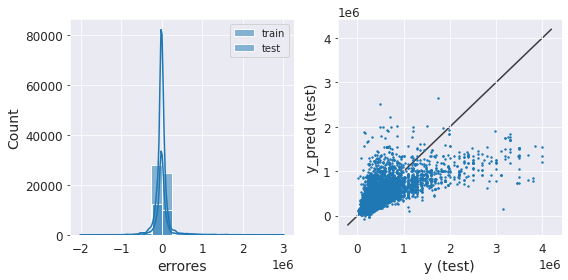

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 64721.0697732051
Raíz del error cuadrático medio en Test: 146092.75848556007


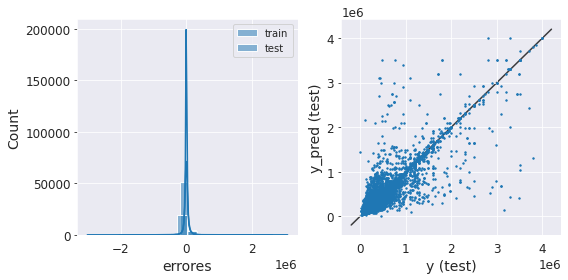

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


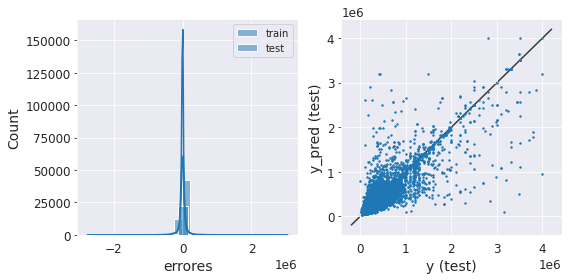

In [46]:
# Luego analizamos la distribución de los errores de las predicciones de cada modelo
# y calculamos la raíz del error cuadrático medio de la cada modelo con los hiperparámetros utilizados
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', kde=True)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde=True)
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

***

<font color='blue'>**Comentarios**</font>

<font color='blue'>Podemos observar que el modelo con menor error cuadrático medio es el de Árboles de decisión, que en principio nos daría las mejores estimaciones.</font>

***

In [47]:
# Ahora vamos a analizar el R2 que puede darnos una idea más comparable del 
# ajuste de los datos predichos con los datos reales de la muestra.
# Importamos la metrica
from sklearn.metrics import r2_score

In [48]:
# Primero calculamos el R^2 del benchmark: Modelo de Regresión Lineal
r2_test_lin = r2_score(y_test,linear_model.predict(X_test))
r2_train_lin = r2_score(y_train,linear_model.predict(X_train))
print('r2_train_lin:', r2_train_lin)
print('r2_test_lin:', r2_test_lin)

r2_train_lin: 0.5517887107017188
r2_test_lin: 0.55148643587972


In [65]:
# Vamos a calcular los R2 variando los hiperparámetros de entrenamiento del modelo
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = np.arange(1,25, 1)

# Generamos un loop sobre los distintos valores de k 
for d in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = d)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    # train_acc = clf.score(X_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    # test_acc = clf.score(X_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)
  

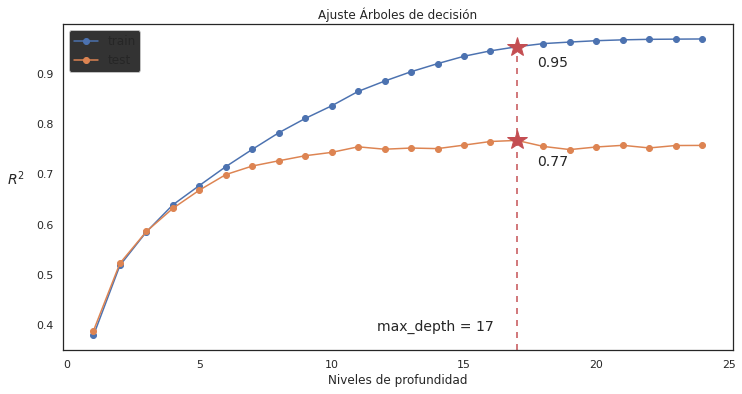

In [66]:
# A continuación creamos el gráfico de los R^2 en función de los niveles de profundidad máxima del modelo de Árboles de decisión.
# Adicionalmente, marcamos el punto óptimo que maximiza el R2 en los datos de testeo.
# Este punto sería el máximo a considerar para definir la profundidad del Árbol de decisión, ya que queremos minimizar el costo computacional de entrenamiento.
plt.figure(figsize=(12,6))
plt.plot(max_depths, lista_r2_train,'o-',label='train' )
plt.plot(max_depths, lista_r2_test,'o-',label='test')

max_r2_test_tree = max(lista_r2_test)
# max_r2_test_tree = np.quantile(lista_r2_test, 0.55, interpolation='nearest')
max_depth = max_depths[np.where(lista_r2_test == max_r2_test_tree)[0][0]]
r_train_tree = lista_r2_train[np.where(lista_r2_test == max_r2_test_tree)[0][0]]

plt.plot(max_depth, max_r2_test_tree, '*r', markersize=20)
plt.plot(max_depth, r_train_tree, '*r', markersize=20)
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]
plt.axvline(x=max_depth, color='r', ymax=(r_train_tree - y_min) / (y_max-y_min), dashes=(4,4))

plt.annotate(np.round(max_r2_test_tree,2), xy=(max_depth, max_r2_test_tree), xytext=(20, -25), size=14, xycoords='data', textcoords='offset points')
plt.annotate(np.round(r_train_tree, 2), xy=(max_depth, r_train_tree), xytext=(20, -20), size=14,xycoords='data', textcoords='offset points')
plt.annotate("max_depth = " + str(np.round(max_depth, 0)), xy=(max_depth, y_min), xytext=(-140, 20), size=14,xycoords='data', textcoords='offset points')

plt.legend(fontsize=12)
plt.title('Ajuste Árboles de decisión')
plt.xlabel('Niveles de profundidad')
plt.ylabel('$R^2$', rotation=0, size=14, labelpad=20)

plt.show()

***

<font color='blue'>**Comentarios**</font>

<font color='blue'>Podemos ver que cerca de `max_depth = 15` se alcanza el máximo $R^2$. Este hiperparámetro se podría reducir para generar un ahorro de esfuerzo computacional en el entrenamiento del modelo, sin reducir demasiado la precisión de las predicciones.</font>

***

In [67]:
# Repetimos lo anterio, pero para el modelo de Vecinos más cercanos
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []
time_list = []
# fisrt_time = milisecs(datetime.now())

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = np.arange(1,25, 1)

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    # train_acc = clf.score(X_train, y_train_pred)
    # time = milisecs(datetime.now()) - fisrt_time
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    # test_acc = clf.score(X_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)
    # time_list.append(time)

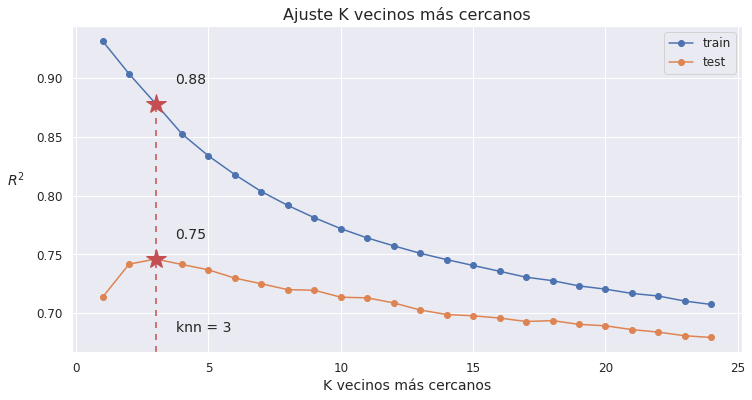

In [82]:
# A continuación creamos el gráfico de los R^2 en función de la cantidad de vecinos del modelo de KNN.

plt.figure(figsize=(12,6))
plt.plot(k_vecinos, lista_r2_train,'o-',label='train' )
plt.plot(k_vecinos, lista_r2_test,'o-',label='test')

max_r2_test_knn = max(lista_r2_test)
n = k_vecinos[np.where(lista_r2_test == max_r2_test_knn)[0][0]]
r_train_knn = lista_r2_train[np.where(lista_r2_test == max_r2_test_knn)[0][0]]

plt.plot(n, max_r2_test_knn, '*r', markersize=20)
plt.plot(n, r_train_knn, '*r', markersize=20)
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]
plt.axvline(x=n, color='r', ymax=(r_train_knn-y_min) / (y_max-y_min), dashes=(4,4))

plt.annotate(np.round(max_r2_test_knn,2), xy=(n, max_r2_test_knn), xytext=(20, 20), size=14, xycoords='data', textcoords='offset points')
plt.annotate(np.round(r_train_knn, 2), xy=(n, r_train_knn), xytext=(20, 20), size=14,xycoords='data', textcoords='offset points')
plt.annotate("knn = " + str(np.round(n, 0)), xy=(n, y_min), xytext=(20, 20), size=14,xycoords='data', textcoords='offset points')

plt.legend(fontsize=12)
plt.title('Ajuste K vecinos más cercanos')
plt.xlabel('K vecinos más cercanos')
plt.ylabel('$R^2$', rotation=0, size=14, labelpad=20)
plt.show()

In [69]:
# Creamos una tabla con los resultados
# LIN = Regresión lineal
# TREE = Modelo de Árboles de decisión
# LIN = Regresión lineal

res = pd.DataFrame([['-', np.round(r2_train_lin, 2), np.round(r2_test_lin, 2)],
                    [max_depth, np.round(r_train_tree, 2), np.round(max_r2_test_tree, 2)], 
                    [n, np.round(r_train_knn, 2), np.round(max_r2_test_knn, 2)]], 
                   columns=['Parámetro', 'R2_train', 'R2_test'], index=['LIN', 'TREE', 'KNN'])
res = res.transpose()
res

,LIN,TREE,KNN
Parámetro,-,17,3
R2_train,0.55,0.95,0.88
R2_test,0.55,0.77,0.75


In [85]:
res.to_csv('proy1.csv')

In [70]:
print('LIN = Regresión lineal')
print('TREE = Modelo de Árboles de decisión')
print('LIN = Regresión lineal')

LIN = Regresión lineal
TREE = Modelo de Árboles de decisión
LIN = Regresión lineal


***

<font color='blue'>**Conclusiones**</font>

<font color='blue'>1. Claramente, ambos modelos de ML predicen mejor que una simple Regresión Lineal.</font>

<font color='blue'>2. Los modelos de ML usados ajustan de forma similar con los datos de testeo.</font>

<font color='blue'>3. El modelo de Árboles de decisión predice levemente mejor que el modelo de KNN en los datos de entrenamiento, pero con un número de `max_depth` que podría reducirse para ahorrar costo de procesamiento.</font>

<font color='blue'>4. El modelo elegido es el de KNN ya que arroja predicciones con $R^2$ (en datos de testeo) similares a las del modelo de Árboles de decisión, utilizando un valor de vecinos bajos (3) con el consiguiente ahorro computacional y sobreajusta menos lo datos en el dataset de entrenamiento (ya que el el $R^2$ se mantiene más cercano al valor en los datos de testeo).</font>

<font color='blue'>5. Una mejora que le haría al modelo es la de poder utilizar alguna variable categórica para predecir los precios ya que, como hemos notado anteriormente, se nota una relación entre la localización del inmueble con el precio por $m^2$ del mismo. Por ejemplo, utilizaría el barrio o las etiquetas de latirud y longitud para predecir el precio.</font>

***

***

<font color='blue'>**Análisis de Dataset Externo**</font>

<font color='blue'>A continuación analizaremos un dataset externo, proveniente de las Estadísticas Públicas de [**Datos Argentina**](https://datos.gob.ar/)</font>

<font color='blue'>Más específicamente utilizaremos el dataset de [Precios en surtidor](https://datos.gob.ar/dataset/energia-precios-surtidor---resolucion-3142016) que contiene información de los precios de combustibles en surtidor, publicados por los titulares de las bocas de expendio de combustibles líquidos dentro del territorio argentino.</font>

***

In [71]:
# Cargamos el dataset
ps = pd.read_csv('http://datos.minem.gob.ar/dataset/1c181390-5045-475e-94dc-410429be4b17/resource/80ac25de-a44a-4445-9215-090cf55cfda5/download/precios-en-surtidor-resolucin-3142016.csv')

In [72]:
ps.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2021-06,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,Gas Oil Grado 2,2,Diurno,91.20,2021-06-03 13:25:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2021-06,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,Gas Oil Grado 2,3,Nocturno,91.20,2021-06-03 13:25:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2021-06,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,Gas Oil Grado 3,2,Diurno,106.40,2021-06-03 13:34:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
3,2021-06,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,Gas Oil Grado 3,3,Nocturno,106.40,2021-06-03 13:34:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
4,2021-06,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,35.99,2021-06-03 13:34:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."


In [73]:
print("Columnas:",ps.shape[1])
print("Filas:",ps.shape[0])

Columnas: 19
Filas: 36857


In [74]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36857 entries, 0 to 36856
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     36857 non-null  object 
 1   idempresa         36857 non-null  int64  
 2   cuit              36857 non-null  object 
 3   empresa           36857 non-null  object 
 4   direccion         36843 non-null  object 
 5   localidad         36857 non-null  object 
 6   provincia         36857 non-null  object 
 7   region            32624 non-null  object 
 8   idproducto        36857 non-null  int64  
 9   producto          36857 non-null  object 
 10  idtipohorario     36857 non-null  int64  
 11  tipohorario       36857 non-null  object 
 12  precio            36857 non-null  float64
 13  fecha_vigencia    36857 non-null  object 
 14  idempresabandera  36857 non-null  int64  
 15  empresabandera    36857 non-null  object 
 16  latitud           36601 non-null  float6

In [75]:
# Cantidad de valores nulos por columns del dataset
nulls = pd.DataFrame(ps.isnull().sum(), columns=['Cantidad de Nulos'])
nulls

,Cantidad de Nulos
indice_tiempo,0
idempresa,0
cuit,0
empresa,0
direccion,14
localidad,0
provincia,0
region,4233
idproducto,0
producto,0


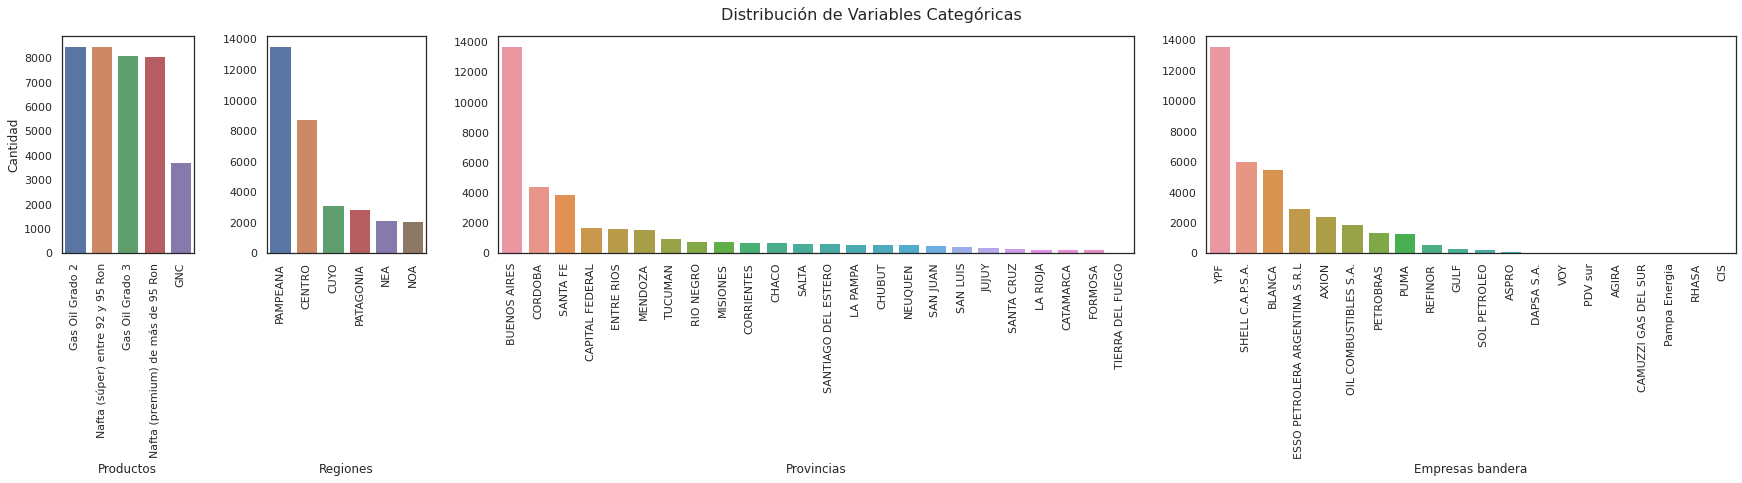

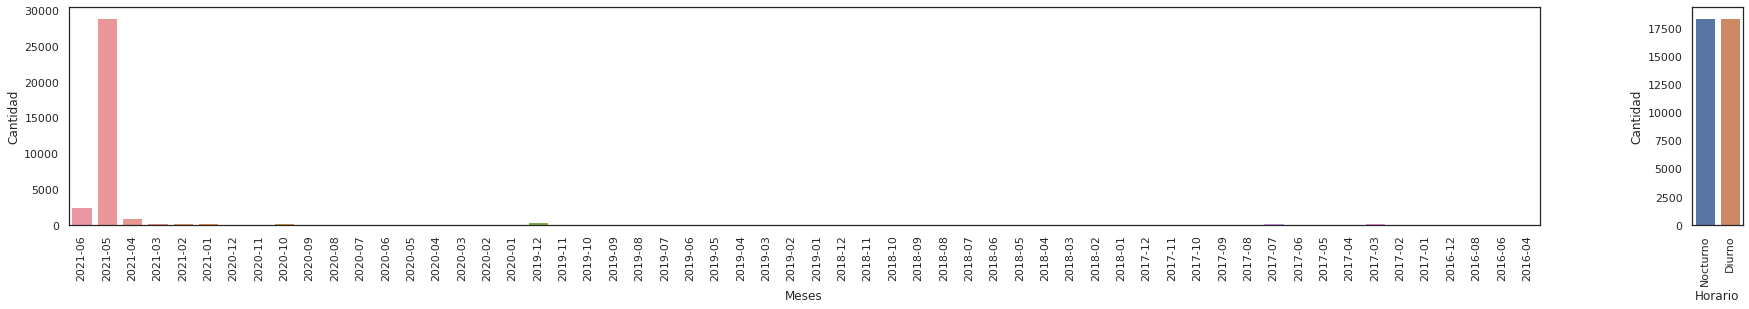

In [76]:
# A contnuación vamos a graficar barplots para las variables categóricas
productos = ps['producto'].value_counts()
provincias = ps['provincia'].value_counts()
regiones = ps['region'].value_counts()
empresabanderas = ps['empresabandera'].value_counts()
meses = ps['indice_tiempo'].value_counts().sort_index(ascending=False)
horarios = ps['tipohorario'].value_counts().sort_index(ascending=False)

fig, axes = plt.subplots(1, 4, figsize=(30, 4), gridspec_kw={'width_ratios': [productos.index.shape[0], 
                                                                              regiones.index.shape[0], 
                                                                              provincias.index.shape[0], 
                                                                              empresabanderas.index.shape[0]]})
fig.suptitle('Distribución de Variables Categóricas')
axes[0] = sns.countplot(ax=axes[0], data=ps, x='producto', order=productos.index)
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Productos')
axes[1] = sns.countplot(ax=axes[1], data=ps, x='region', order=regiones.index)
axes[1].set_xlabel('Regiones')
axes[2] = sns.countplot(ax=axes[2], data=ps, x='provincia', order=provincias.index)
axes[2].set_xlabel('Provincias')
axes[3] = sns.countplot(ax=axes[3], data=ps, x='empresabandera', order=empresabanderas.index)
axes[3].set_xlabel('Empresas bandera')

for ax in axes[1:]:
  ax.set_ylabel('')

for ax in axes:
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

fig.align_labels()

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(30, 4), gridspec_kw={'width_ratios': [meses.index.shape[0], horarios.index.shape[0]]})
axes[0] = sns.countplot(ax=axes[0], data=ps, x='indice_tiempo', order=meses.index)
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Meses')

axes[1] = sns.countplot(ax=axes[1], data=ps, x='tipohorario', order=horarios.index)
axes[1].set_ylabel('Cantidad')
axes[1].set_xlabel('Horario')

# for ax in axes[1:]:
#   ax.set_ylabel('')

for ax in axes:
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

fig.align_labels()

plt.show()

***
<font color='blue'>**Comentarios**</font>

<font color='blue'>Se observan muchas fechas antiguas (anteriores al mes actual: mayo de 2021), por lo que vamos a filtrar los datos viejos.</font>
<font color='blue'></font>
***

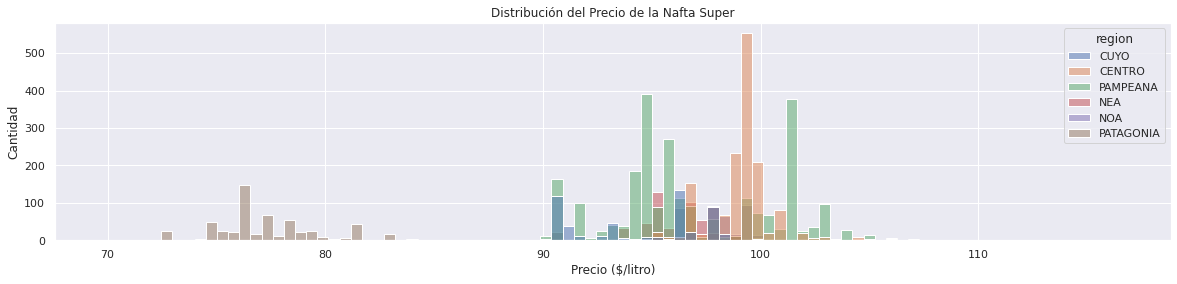

In [77]:
# A contnuación vamos a graficar histogramas para las variables numéricas
sns.set_style("darkgrid")
ps2 = ps[
        #  (ps.precio > 70) & 
        #  (ps.precio < 110) & 
         (ps.producto==productos.index[1]) 
         & (ps.indice_tiempo == '2021-05')
        ]
ps2 = ps2.dropna()

regiones=ps2['region'].value_counts()

plt.figure(figsize=(20, 4))
sns.histplot(data=ps2, x='precio', hue='region')
plt.title('Distribución del Precio de la Nafta Super')
plt.ylabel('Cantidad')
plt.xlabel('Precio ($/litro)')
# plt.xlim(0, 120)

plt.show()

In [78]:
# Filtramos el dataset por region para una mejor visualización de la variable Precio
mascara_1 = (ps2.precio > 88) & (ps2.precio < 105) & (ps2.region == regiones.index[0]) # PAMPEANA
mascara_2 = (ps2.precio > 93) & (ps2.precio < 105) & (ps2.region == regiones.index[1]) # CENTRO
mascara_3 = (ps2.precio > 70) & (ps2.precio < 85) & (ps2.region == regiones.index[2]) # PATAGONIA
mascara_4 = (ps2.precio > 87) & (ps2.precio < 105) & (ps2.region == regiones.index[3]) # CUYO
mascara_5 = (ps2.precio > 90) & (ps2.precio < 105) & (ps2.region == regiones.index[4]) # NEA
mascara_6 = (ps2.precio > 93) & (ps2.precio < 105) & (ps2.region == regiones.index[5]) # NOA

# Filtro los dataset
ps2_1 = ps2[mascara_2]
ps2_2 = ps2[mascara_6]
ps2_3 = ps2[mascara_1]
ps2_4 = ps2[mascara_5]
ps2_5 = ps2[mascara_4]
ps2_6 = ps2[mascara_3]

#  Y los uno en uno nuevo

ps3 = ps2_1.append(ps2_2).append(ps2_3).append(ps2_4).append(ps2_5).append(ps2_6)
td = ps3.pivot_table(values='precio',index='region', aggfunc='mean').sort_values(by='precio',ascending=False)

In [79]:
region_mean_price = ps3.groupby('region')['precio'].mean()
ps3['mean_price'] = ps3['region'].map(region_mean_price)

***
###**<font color='blue'>Pregunta</font>**

<font color='blue'>La pregunta a responder con el dataset de *Precios en Surtidor* es:

**¿En qué región del territorio de la República Argentina cuesta más barata en promedio la nafta súper?**</font>

***

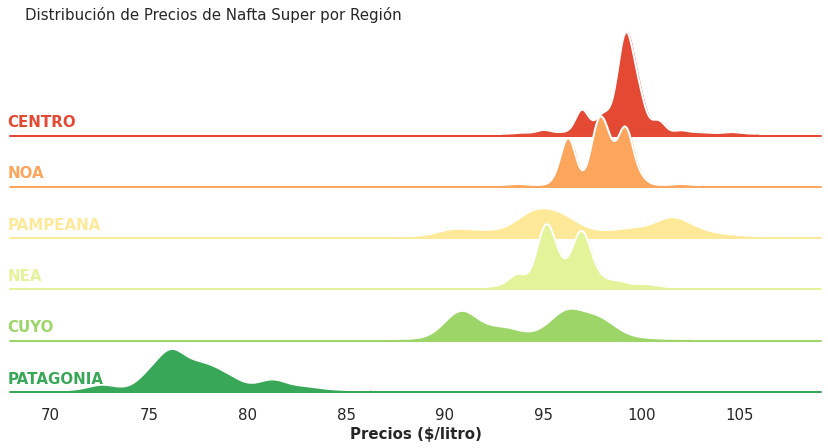

In [80]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.color_palette(palette='RdYlGn', n_colors=td.shape[0])

g = sns.FacetGrid(ps3, row='region', aspect=12, height=1, palette=pal, hue='region')

g.map(sns.kdeplot, 'precio',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, 'precio', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

g.map(plt.axhline, y=-0.01,
      lw=2, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(min(ps3.precio) - 4, 0.04, td.index[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

g.fig.subplots_adjust(hspace=-0.55)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15)
plt.xlabel('Precios ($/litro)', fontweight='bold', fontsize=15)
g.fig.suptitle('Distribución de Precios de Nafta Super por Región',
               ha='right',
               fontsize=15,
               fontweight=15)

plt.show()

***
###**<font color='blue'>Respuesta</font>**

<font color='blue'>**En la región patagónica el precio de la nafta súper es más barata que en el resto del país.**</font>

***